# Assignment_4 :  Simple_Linear_Regression

1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# EDA :

In [5]:
data = pd.read_csv('C:/Users/malho/Downloads/Salary_Data.csv')
print("\n Shape is                     : \n", data.shape)
print("\n Data Types                   : \n", data.dtypes)
print("\n Null values are              : \n ",data.isna().sum())
print("\n Discriptive Analysis of data : \n", data.describe())
print("\n Data Info                    : \n", data.info())
print("Column names                    : \n", data.columns)


 Shape is                     : 
 (30, 2)

 Data Types                   : 
 YearsExperience    float64
Salary             float64
dtype: object

 Null values are              : 
  YearsExperience    0
Salary             0
dtype: int64

 Discriptive Analysis of data : 
        YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes

 Data Info                    : 
 None
Column names   

In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Correlation

In [6]:
print("\n Correlation Between data points: \n", data.corr())  
# value= 0.978242, we can say, correlation between YearsExperience and salary is positive.


 Correlation Between data points: 
                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


# Data Visualization :

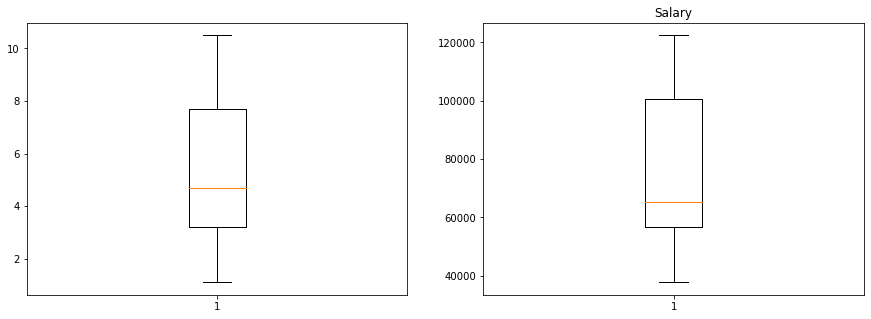

In [7]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].boxplot(data['YearsExperience']);plt.title("Years Experience")
ax[1].boxplot(data['Salary']);plt.title("Salary")
plt.show()

# Transformation for continuous variable : 

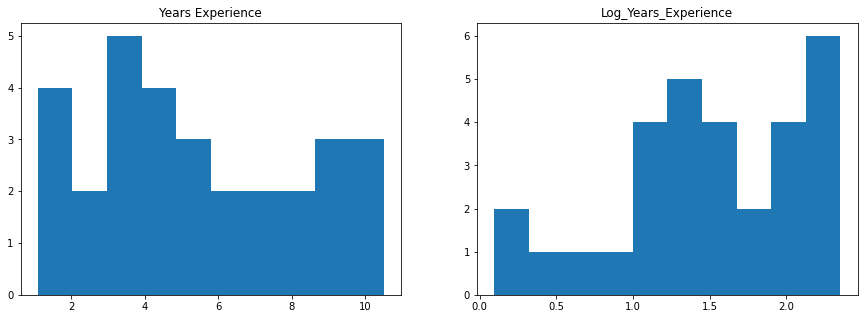

In [8]:
# log trasformation :
data['log_YE']= np.log(data["YearsExperience"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].hist(data['log_YE']);ax[1].set_title("Log_Years_Experience")
plt.show()

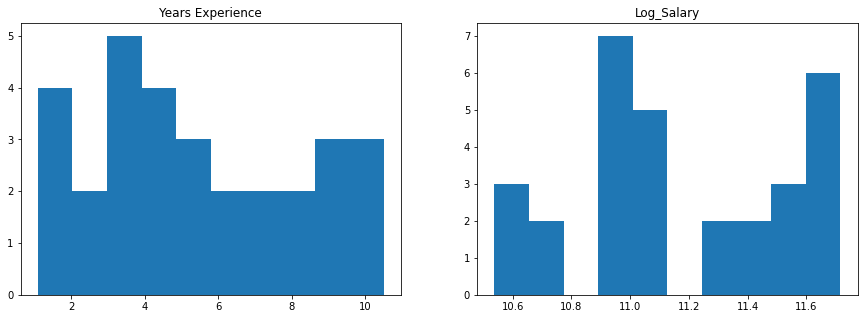

In [12]:
data['log_S']= np.log(data["Salary"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].hist(data['log_S']);ax[1].set_title("Log_Salary")
plt.show()

C:\Users\malho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


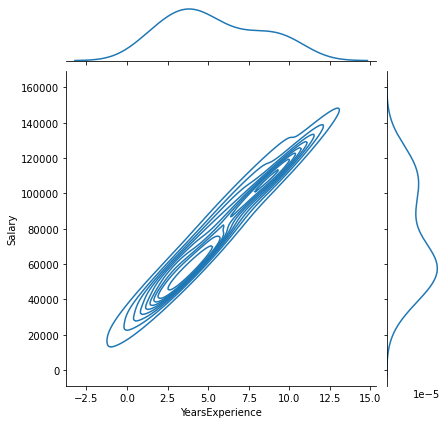

In [13]:
sns.jointplot(data['YearsExperience'],data['Salary'], kind='kde')
plt.show()

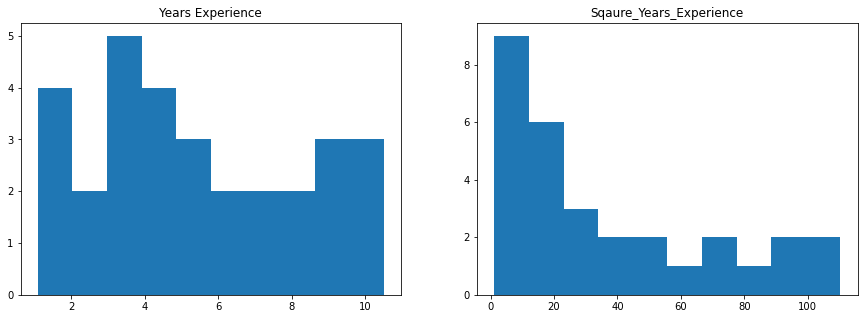

In [14]:
data['sqr_YE']= np.square(data["YearsExperience"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].hist(data['sqr_YE']);ax[1].set_title("Sqaure_Years_Experience")
plt.show()

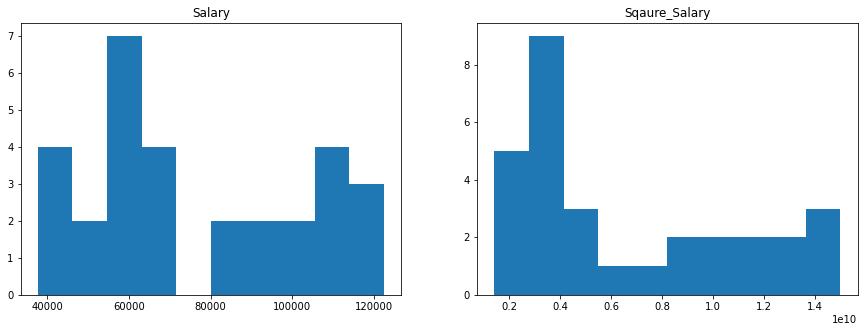

In [15]:
data['sqr_S']= np.square(data["Salary"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Salary']);ax[0].set_title("Salary")
ax[1].hist(data['sqr_S']);ax[1].set_title("Sqaure_Salary")
plt.show()

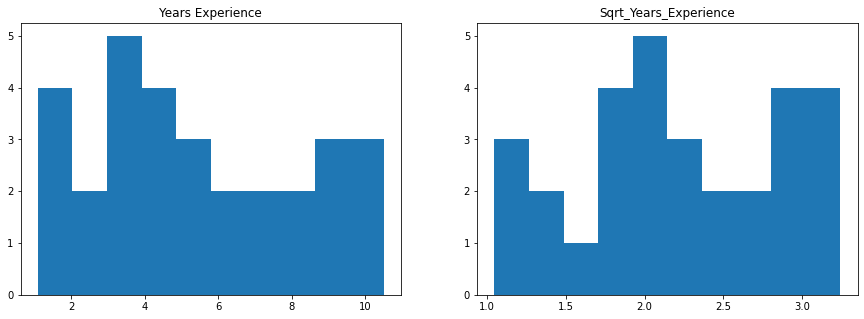

In [16]:
data['sqrt_YE']= np.sqrt(data["YearsExperience"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].hist(data['sqrt_YE']);ax[1].set_title("Sqrt_Years_Experience")
plt.show()

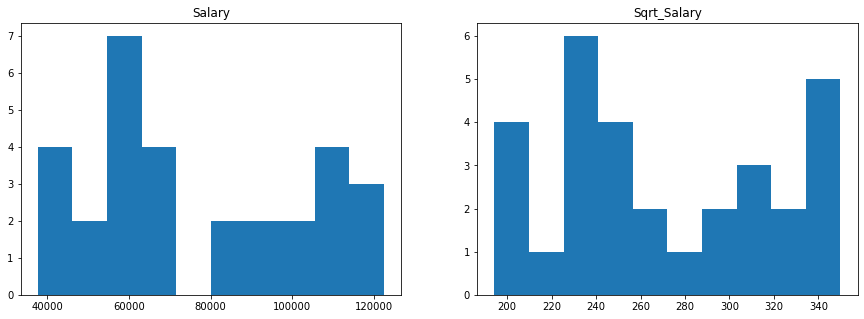

In [17]:
data['sqrt_S']= np.sqrt(data["Salary"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Salary']);ax[0].set_title("Salary")
ax[1].hist(data['sqrt_S']);ax[1].set_title("Sqrt_Salary")
plt.show()

C:\Users\malho\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


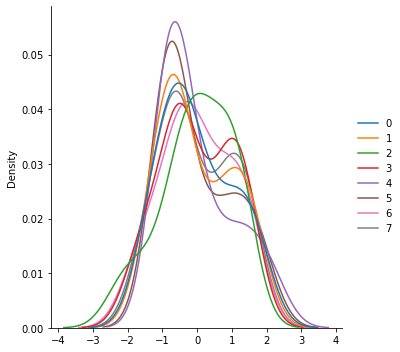

In [18]:
from sklearn.preprocessing import scale
df = data.values
df1 = scale(df)  # Used to standardized the dataset
sns.displot(df1, kind='kde')
plt.show()

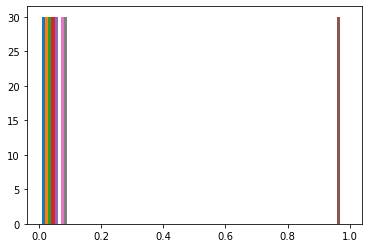

In [19]:
# Normalize Data set
from sklearn.preprocessing import normalize
df1 = normalize(data)
plt.hist(df1)
plt.show()
#df1

# Model Building

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

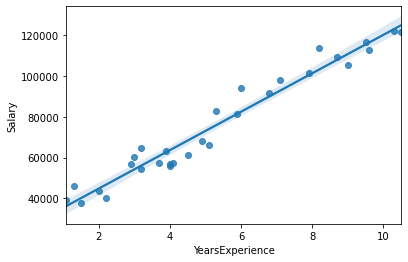

In [20]:
sns.regplot(x="YearsExperience", y="Salary", data=data)

# Model fitting :

In [21]:
#Fitting linear regression model
model = smf.ols("Salary~YearsExperience", data=data).fit()

# Model Testing :

In [22]:
#Coefficients
dir(model)
model.params  

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
# t values and p values
print("t values are :\n",  model.tvalues, '\n', "p values are : \n ", model.pvalues)

t values are :
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 p values are : 
  Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [24]:
# Coefficient of determination: R Squared values
print("R Squared value is:", model.rsquared, "\nR Squared_adjacent value is:", model.rsquared_adj)
# R squared value = 0.95 so we can say the line is really good.

R Squared value is: 0.9569566641435086 
R Squared_adjacent value is: 0.9554194021486339


# Model Prediction :

In [19]:
new_data= pd.Series([4,5])
new_data
data_pred=pd.DataFrame(new_data, columns=["YearsExperience"])
data_pred

,YearsExperience
0,4
1,5


In [25]:
model.predict(data_pred)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'YearsExperience' is not defined
    Salary~YearsExperience
           ^^^^^^^^^^^^^^^

# 1) Delivery_time -> Predict delivery time using sorting time 

# EDA

In [27]:
df = pd.read_csv('C:/Users/malho/Downloads/delivery_time.csv')
print("\n Shape is                     : \n", df.shape)
print("\n Data Types                   : \n", df.dtypes)
print("\n Null values are              : \n ",df.isna().sum())
print("\n Discriptive Analysis of data : \n", df.describe())
print("\n Data Info                    : \n", df.info())
print("Column names                    : \n", df.columns)

# Rename Columns :

df["Delivery_Time"]= df["Delivery Time"].rename("Delivery_Time")
df["Sorting_Time"]= df["Sorting Time"].rename("Sorting_Time")
# Drop Columns :

df.drop(["Delivery Time", "Sorting Time"], axis=1, inplace=True)
# Drop null values from the data

df=df.dropna()
df


 Shape is                     : 
 (21, 2)

 Data Types                   : 
 Delivery Time    float64
Sorting Time       int64
dtype: object

 Null values are              : 
  Delivery Time    0
Sorting Time     0
dtype: int64

 Discriptive Analysis of data : 
        Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes

 Data Info                    : 
 None
Column names                    : 
 Index(['Deli

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [22]:
print(df.corr())   
# Value is 0.825997 so we can say Delivery Time and Sorting Time are positively correlated.

               Delivery_Time  Sorting_Time
Delivery_Time       1.000000      0.825997
Sorting_Time        0.825997      1.000000


# Data Visualization

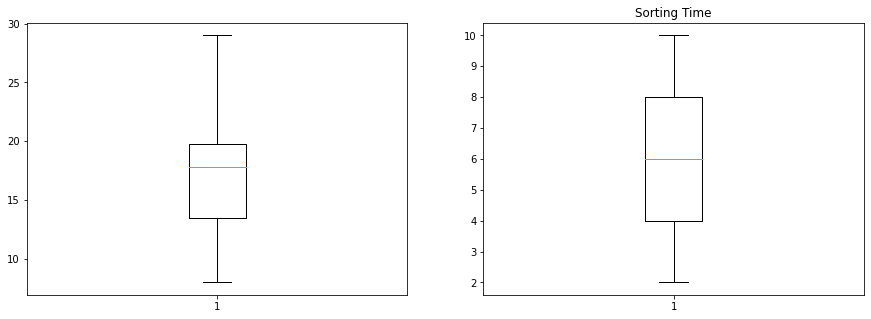

In [23]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].boxplot(df['Delivery_Time']);plt.title("Delivery Time")
ax[1].boxplot(df['Sorting_Time']);plt.title("Sorting Time")
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


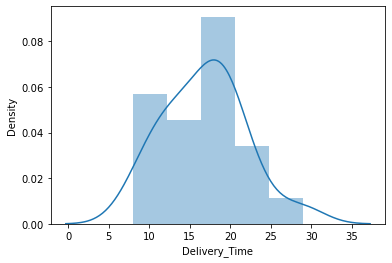

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


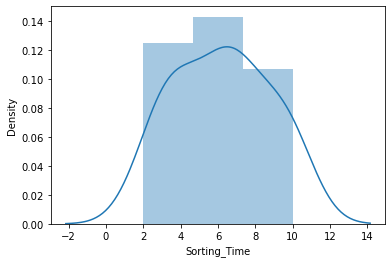

In [24]:
sns.distplot(df["Delivery_Time"])
plt.show()
sns.distplot(df["Sorting_Time"])
plt.show()

# Model Building

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

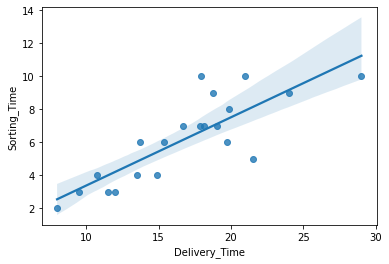

In [25]:
sns.regplot(x='Delivery_Time',y='Sorting_Time', data=df)

# Model fitting

In [26]:
model=smf.ols("Sorting_Time~Delivery_Time", data=df).fit()

# Coefficient

In [27]:
# Coefficients:
model.params

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [28]:
# t values and p values:
print("t Value is:\n", model.tvalues,'\n',"p Value is:\n", model.pvalues)

t Value is:
 Intercept       -0.667290
Delivery_Time    6.387447
dtype: float64 
 p Value is:
 Intercept        0.512611
Delivery_Time    0.000004
dtype: float64


In [29]:
# Coefficient of determination: R Squared values
print("R squared value is:\n", model.rsquared,'\n', "R squared_adjacent value is:\n",  model.rsquared_adj)
# R squared value = 0.68, we can say line is good.

R squared value is:
 0.6822714748417231 
 R squared_adjacent value is:
 0.6655489208860244


# Model Prediction

In [9]:
new_data= pd.Series([5,7])
new_data
data_pred=pd.DataFrame(new_data, columns=["Delivery_Time"])
data_pred

,Delivery_Time
0,5
1,7


In [11]:
model.predict(data_pred)

NameError: name 'model' is not defined